In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.2 MB/s eta 0:00:00


In [ ]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])


Predicted class: Egyptian cat


In [ ]:
import torch

In [ ]:
print((inputs["pixel_values"].shape))

torch.Size([1, 3, 224, 224])


In [ ]:
key= list(inputs.keys())
print(key)

['pixel_values']


In [ ]:
for key in inputs:
  print(key)

pixel_values


In [ ]:
!pip install -qqq easy-vqa
!pip install -qqq sentence_transformers transformers timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.5 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/vzhou842/easy-VQA

Cloning into 'easy-VQA'...
remote: Enumerating objects: 20271, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 20271 (delta 49), reused 46 (delta 46), pack-reused 20215
Receiving objects: 100% (20271/20271), 9.73 MiB | 21.47 MiB/s, done.
Resolving deltas: 100% (137/137), done.


In [ ]:
!python /content/easy-VQA/gen_data/generate_data.py

Generated 4000 train images and 38468 train questions.
Generated 1000 test images and 9635 test questions.
13 total possible answers.
28232 training questions are yes/no.
7026 testing questions are yes/no.


In [ ]:
from easy_vqa import get_train_questions, get_test_questions

train_questions, train_answers, train_image_ids = get_train_questions()
test_questions, test_answers, test_image_ids = get_test_questions()

# Question 0 is at index 0 for all 3 arrays:
print(train_questions[0]) # what shape does the image contain?
print(train_answers[0])   # circle
print(train_image_ids[0]) # 0


what is the blue shape?
rectangle
0


In [ ]:
from easy_vqa import get_train_image_paths, get_test_image_paths

train_image_paths = get_train_image_paths()
test_image_paths = get_test_image_paths()

print(train_image_paths[0]) # ends in easy_vqa/data/train/images/0.png

/usr/local/lib/python3.10/dist-packages/easy_vqa/data/train/images/0.png


In [ ]:
from easy_vqa import get_train_questions, get_test_questions

train_questions, train_answers, train_image_ids = get_train_questions()
test_questions, test_answers, test_image_ids = get_test_questions()

In [ ]:
import pandas as pd
pd.set_option("max_colwidth", None)

def gen_dataframes(questions, answers, image_ids, mode="train"):
    records = []
    for question, answer, image_id in zip(questions, answers, image_ids):
        image_path = f"/content/easy_vqa/data/{mode}/images/{image_id}.png"
        records.append({"question" : question, "answer": answer, "image_path": image_path})
    return pd.DataFrame(records)

df =  gen_dataframes(train_questions, train_answers, train_image_ids)
from sklearn.model_selection import train_test_split
df = df.sample(frac=1)
train_df, eval_df = train_test_split(df)
test_df =  gen_dataframes(test_questions, test_answers, test_image_ids, mode="test")

In [ ]:
print(train_df.shape)
print(eval_df.shape)
print(test_df.shape)

(28931, 3)
(9644, 3)
(9673, 3)


In [ ]:
from easy_vqa import get_answers

answers = get_answers()
print("Total labels", len(answers))
label2idx = {answer:i for i, answer in enumerate(answers)}

Total labels 13


In [ ]:
label2idx

{'circle': 0,
 'green': 1,
 'red': 2,
 'gray': 3,
 'yes': 4,
 'teal': 5,
 'black': 6,
 'rectangle': 7,
 'yellow': 8,
 'triangle': 9,
 'brown': 10,
 'blue': 11,
 'no': 12}

In [ ]:
train_df["label"] = train_df["answer"].apply(lambda x: label2idx.get(x))
eval_df["label"] = eval_df["answer"].apply(lambda x: label2idx.get(x))
test_df["label"] = test_df["answer"].apply(lambda x: label2idx.get(x))

In [ ]:
train_df.sample(5)

,question,answer,image_path,label
1927,what is the color of the rectangle?,teal,/content/easy_vqa/data/train/images/196.png,5
1737,is there a gray shape?,no,/content/easy_vqa/data/train/images/176.png,12
14117,does the image contain a green shape?,no,/content/easy_vqa/data/train/images/1467.png,12
29937,does the image not contain a green shape?,yes,/content/easy_vqa/data/train/images/3111.png,4
2972,what color is the shape?,teal,/content/easy_vqa/data/train/images/302.png,5


In [ ]:
from transformers import AutoTokenizer, AutoFeatureExtractor, AutoModel, RobertaModel, RobertaTokenizer
import torchvision.transforms as T
import torch
import timm


""" Fusing Transformers """
device = "cuda:0" if torch.cuda.is_available() else "cpu"

model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
text_encoder = RobertaModel.from_pretrained(model_name)

for p in text_encoder.parameters():
    p.requires_grad = False


image_processor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
image_encoder = AutoModel.from_pretrained("google/vit-base-patch16-224-in21k")

""" Fusing CNNs and Transformers """
# device = "cuda:0" if torch.cuda.is_available() else "cpu"
# image_encoder = timm.create_model("resnet50d", pretrained=True,  num_classes=0)
# resize_transform = T.Resize((224, 224))

for p in image_encoder.parameters():
    p.requires_grad = False


image_encoder.to(device)
text_encoder.to(device)

print()


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
from PIL import Image
from tqdm import tqdm
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import transforms

class EasyQADataset(Dataset):

    def __init__(self,df,
                 image_encoder,
                 text_encoder,
                 image_processor,
                 tokenizer,
              ):
        self.df = df
        self.image_encoder = image_encoder
        self.text_encoder = text_encoder
        self.image_processor = image_processor
        self.tokenizer = tokenizer


    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):

        image_file = self.df["image_path"][idx]
        question = self.df['question'][idx]
        image = Image.open(image_file).convert("RGB")
        label = self.df['label'][idx]

        """ When CNNs are used for V backbone"""

        # image = resize_transform(image)
        # image_inputs = T.ToTensor()(image).unsqueeze_(0)
        # image_inputs = image_inputs.to(device)
        # image_outputs = self.image_encoder(image_inputs)
        # image_embedding = image_outputs[0]
        # image_embedding = image_embedding.detach()
        # print("Image emb", image_embedding.shape)

        """ When Transformers are used for V backbone"""
        image_inputs = self.image_processor(image, return_tensors="pt")
        image_inputs = {k:v.to(device) for k,v in image_inputs.items()}
        image_outputs = self.image_encoder(**image_inputs)
        image_embedding = image_outputs.pooler_output
        image_embedding = image_embedding.view(-1)
        image_embedding = image_embedding.detach()
        # print("Image emb", image_embedding.shape)

        text_inputs = self.tokenizer(question, return_tensors="pt")
        text_inputs = {k:v.to(device) for k,v in text_inputs.items()}
        text_outputs = self.text_encoder(**text_inputs)
        text_embedding = text_outputs.pooler_output # You can experiment with this or raw CLS embedding below
        #text_embedding = text_outputs.last_hidden_state[:,0,:] # Raw CLS embedding
        text_embedding = text_embedding.view(-1)
        text_embedding = text_embedding.detach()
        # print("Text emb", text_embedding.shape)

        encoding={}
        encoding["image_emb"] = image_embedding
        encoding["text_emb"] = text_embedding
        encoding["label"] = torch.tensor(label)

        return encoding

In [ ]:
train_df.reset_index(drop=True, inplace=True)
eval_df.reset_index(drop=True, inplace=True)

train_dataset = EasyQADataset(
                           df=train_df,
                           image_encoder = image_encoder,
                           text_encoder = text_encoder,
                           tokenizer = tokenizer,
                           image_processor = image_processor, # Pass None when using CNNs
                           )

eval_dataset = EasyQADataset(
                           df=eval_df,
                           image_encoder = image_encoder,
                           text_encoder = text_encoder,
                           tokenizer = tokenizer,
                           image_processor = image_processor,# Pass None when using CNNs
                          )

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32
eval_batch_size = 32
dataloader_train = DataLoader(train_dataset,
                              sampler=RandomSampler(train_dataset),
                              batch_size=batch_size)
dataloader_validation = DataLoader(eval_dataset,
                                   sampler=SequentialSampler(eval_dataset),
                                   batch_size=eval_batch_size)

In [ ]:
from sklearn.metrics import accuracy_score

def accuracy_score_func(preds, labels):
    return accuracy_score(labels, preds)

In [ ]:
import random
from torch import nn
from tqdm.notebook import tqdm
import numpy as np
import requests

criterion = nn.CrossEntropyLoss()

def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals, confidence = [], [], []

    for batch in dataloader_val:

        batch = tuple(b.to(device) for b in batch.values())

        inputs = {'image_emb':  batch[0],'text_emb': batch[1]}

        with torch.no_grad():
            outputs = model(**inputs)

        labels =  batch[2]
        loss = criterion(outputs.view(-1, 13), labels.view(-1))
        loss_val_total += loss.item()

        probs   = torch.max(outputs.softmax(dim=1), dim=-1)[0].detach().cpu().numpy()
        outputs = outputs.argmax(-1)
        logits = outputs.detach().cpu().numpy()
        label_ids = labels.cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
        confidence.append(probs)

    loss_val_avg = loss_val_total/len(dataloader_val)
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
    confidence = np.concatenate(confidence, axis=0)

    return loss_val_avg, predictions, true_vals, confidence

def train():

  train_history = open("/content/models/train_history.csv", "w")
  log_hdr  = "Epoch, train_loss, train_acc, val_loss, val_acc"
  train_history.write(log_hdr  + "\n")
  train_f1s = []
  val_f1s = []
  train_losses = []
  val_losses = []
  min_val_loss = -1
  max_auc_score = 0
  epochs_no_improve = 0
  early_stopping_epoch = 3
  early_stop = False

  for epoch in tqdm(range(1, epochs+1)):

      model.train()
      loss_train_total = 0
      train_predictions, train_true_vals = [], []

      progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)

      for batch in progress_bar:
          model.zero_grad()
          batch = tuple(b.to(device) for b in batch.values())

          inputs = {'image_emb':  batch[0],'text_emb': batch[1]}
          labels =  batch[2]

          outputs = model(**inputs)
          loss = criterion(outputs.view(-1, 13), labels.view(-1))
          loss_train_total += loss.item()
          loss.backward()
          torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

          logits = outputs.argmax(-1)
          logits = logits.detach().cpu().numpy()
          label_ids = labels.cpu().numpy()
          train_predictions.append(logits)
          train_true_vals.append(label_ids)

          optimizer.step()
          scheduler.step()

          progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})



      train_predictions = np.concatenate(train_predictions, axis=0)
      train_true_vals = np.concatenate(train_true_vals, axis=0)

      tqdm.write(f'\nEpoch {epoch}')
      loss_train_avg = loss_train_total/len(dataloader_train)
      tqdm.write(f'Training loss: {loss_train_avg}')
      train_f1 = accuracy_score_func(train_predictions, train_true_vals)
      tqdm.write(f'Train Acc: {train_f1}')

      val_loss, predictions, true_vals,_ = evaluate(dataloader_validation)
      val_f1 = accuracy_score_func(predictions, true_vals)
      tqdm.write(f'Validation loss: {val_loss}')
      tqdm.write(f'Val Acc: {val_f1}')

      if val_f1 >= max_auc_score:
          tqdm.write('\nSaving best model')
          torch.save(model.state_dict(), f'/content/models/easyvqa_finetuned_epoch_{epoch}.model')
          max_auc_score = val_f1

      train_losses.append(loss_train_avg)
      val_losses.append(val_loss)
      train_f1s.append(train_f1)
      val_f1s.append(val_f1)
      log_str  = "{}, {}, {}, {}, {}".format(epoch, loss_train_avg, train_f1, val_loss, val_f1)
      train_history.write(log_str + "\n")

      if min_val_loss < 0:
          min_val_loss = val_loss
      else:
        if val_loss < min_val_loss:
            min_val_loss = val_loss
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= early_stopping_epoch:
                early_stop = True
                break
            else:
                continue


  if early_stop:
    print("Early Stopping activated at epoch -", epoch )
    print("Use the checkpoint at epoch - ", epoch - early_stopping_epoch)

  train_history.close()
  return train_losses, val_losses

In [ ]:
class EasyQAEarlyFusionNetwork(nn.Module):

    def __init__(self, hyperparms=None):

        super(EasyQAEarlyFusionNetwork, self).__init__()
        self.dropout = nn.Dropout(0.3)
        self.vision_projection = nn.Linear(2048, 768)
        self.text_projection = nn.Linear(512, 768)
        self.fc1 = nn.Linear(768, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.classifier = nn.Linear(256, 13)
        W = torch.Tensor(768, 768)
        self.W = nn.Parameter(W)
        self.relu_f = nn.ReLU()
        # initialize weight matrices
        nn.init.kaiming_uniform_(self.W, a=math.sqrt(5))

    def forward(self, image_emb, text_emb):

        x1 = image_emb
        x1 = torch.nn.functional.normalize(x1, p=2, dim=1)
        Xv = self.relu_f(self.vision_projection(x1))

        x2 = text_emb
        x2 = torch.nn.functional.normalize(x2, p=2, dim=1)
        Xt = self.relu_f(self.text_projection(x2))

        Xvt = Xv * Xt
        Xvt = self.relu_f(torch.mm(Xvt, self.W.t()))

        Xvt = self.fc1(Xvt)
        Xvt = self.bn1(Xvt)
        Xvt = self.dropout(Xvt)
        Xvt = self.classifier(Xvt)

        return Xvt

In [ ]:
import math
class EasyQAMidFusionNetwork(nn.Module):

    def __init__(self, hyperparms=None):

        super(EasyQAMidFusionNetwork, self).__init__()
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(768, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.classifier = nn.Linear(256, 13)
        W = torch.Tensor(768, 768)
        self.W = nn.Parameter(W)
        self.relu_f = nn.ReLU()
        # initialize weight matrices
        nn.init.kaiming_uniform_(self.W, a=math.sqrt(5))

    def forward(self, image_emb, text_emb):

        x1 = image_emb
        Xv = torch.nn.functional.normalize(x1, p=2, dim=1)

        x2 = text_emb
        Xt = torch.nn.functional.normalize(x2, p=2, dim=1)

        Xvt = Xv * Xt
        Xvt = self.relu_f(torch.mm(Xvt, self.W.t()))

        Xvt = self.fc1(Xvt)
        Xvt = self.bn1(Xvt)
        Xvt = self.dropout(Xvt)
        Xvt = self.classifier(Xvt)

        return Xvt

In [ ]:
torch.cuda.empty_cache()
model = EasyQAMidFusionNetwork()
model.to(device)

EasyQAMidFusionNetwork(
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=768, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (classifier): Linear(in_features=256, out_features=13, bias=True)
  (relu_f): ReLU()
)

In [ ]:
from transformers import get_linear_schedule_with_warmup
from torch.optim import AdamW

optimizer = AdamW(model.parameters(),
                  lr=5e-5,
                  weight_decay = 1e-5,
                  eps=1e-8
                  )

epochs = 10
train_steps=20000
print("train_steps", train_steps)
warm_steps = train_steps * 0.1
print("warm_steps", warm_steps)
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=warm_steps,
                                            num_training_steps=train_steps)

train_steps 20000
warm_steps 2000.0


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/905 [00:00<?, ?it/s]


Epoch 1
Training loss: 2.5056166856987043
Train Acc: 0.33438180498427295
Validation loss: 2.4604724985084787
Val Acc: 0.38479883865615927

Saving best model


Epoch 2:   0%|          | 0/905 [00:00<?, ?it/s]


Epoch 2
Training loss: 2.1711379285675387
Train Acc: 0.3997096540043552
Validation loss: 1.5515306291990723
Val Acc: 0.4496059726254666

Saving best model


Epoch 3:   0%|          | 0/905 [00:00<?, ?it/s]


Epoch 3
Training loss: 1.3014264933970752
Train Acc: 0.48605302270920464
Validation loss: 1.1653157786423007
Val Acc: 0.5578598092077975

Saving best model


Epoch 4:   0%|          | 0/905 [00:00<?, ?it/s]


Epoch 4
Training loss: 1.099121328085167
Train Acc: 0.5800352562994712
Validation loss: 1.046035585024499
Val Acc: 0.5849232683533804

Saving best model


Epoch 5:   0%|          | 0/905 [00:00<?, ?it/s]


Epoch 5
Training loss: 1.0175908387695227
Train Acc: 0.6205454356918184
Validation loss: 1.0037041726886042
Val Acc: 0.613023641642472

Saving best model


Epoch 6:   0%|          | 0/905 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.9824997597636439
Train Acc: 0.6354429504683557
Validation loss: 0.9589085551287164
Val Acc: 0.6363542098714227

Saving best model


Epoch 7:   0%|          | 0/905 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.9573280442485493
Train Acc: 0.6421485603677716
Validation loss: 0.9493913338673825
Val Acc: 0.6385317295727914

Saving best model


Epoch 8:   0%|          | 0/905 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.9306746011939496
Train Acc: 0.6478517852822232
Validation loss: 0.9365339156807653
Val Acc: 0.6354209871422646


Epoch 9:   0%|          | 0/905 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.9010459025920425
Train Acc: 0.6569769451453458
Validation loss: 0.8863736535144957
Val Acc: 0.6548112816258814

Saving best model


Epoch 10:   0%|          | 0/905 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.8753843312764036
Train Acc: 0.6634751650478725
Validation loss: 0.8652953819328586
Val Acc: 0.6575072583990046

Saving best model


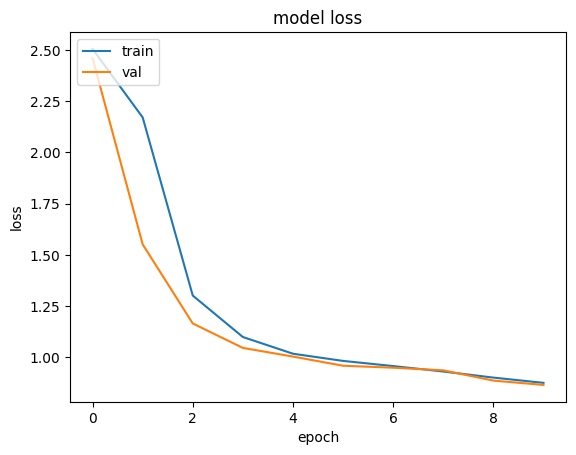

In [ ]:
from matplotlib import pyplot as plt
# try:
!rm -rf /content/models
!mkdir /content/models
train_losses, val_losses =  train()
torch.cuda.empty_cache()
plt.plot(train_losses)
plt.plot(val_losses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# except:
#     print("Sh*t happens !, if you are a self-respecting human, don't rote copy this. Catch the exception and write a nice message")

In [ ]:
test_dataset = EasyQADataset(
                           df=test_df,
                           image_encoder = image_encoder,
                           text_encoder = text_encoder,
                           tokenizer = tokenizer,
                           image_processor = image_processor
                           )

In [ ]:
device = "cuda:0"
model.load_state_dict(torch.load('/content/models/easyvqa_finetuned_epoch_7.model'))
model.to(device)

EasyQAMidFusionNetwork(
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=768, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (classifier): Linear(in_features=256, out_features=13, bias=True)
  (relu_f): ReLU()
)

In [ ]:
dataloader_test = DataLoader(test_dataset,
                            sampler=SequentialSampler(test_dataset),
                            batch_size=128)

_, preds, truths, confidence = evaluate(dataloader_test)

In [ ]:
print(_,preds,truths,confidence)

0.879141670308615 [ 9  5  9 ... 12 12  4] [ 9  2  2 ... 12 12  4] [0.189603   0.14024368 0.14169711 ... 0.82260084 0.8768337  0.8471401 ]


In [ ]:
print(_)

0.879141670308615


In [ ]:
print(preds)

[ 9  5  9 ... 12 12  4]


In [ ]:
print(truths)

[ 9  2  2 ... 12 12  4]


In [ ]:
print("probability score of all the test image ",confidence)

probability score of all the test image  [0.189603   0.14024368 0.14169711 ... 0.82260084 0.8768337  0.8471401 ]


In [ ]:


# Calculate accuracy
correct_predictions = sum([1 for p, g in zip(preds, truths) if p == g])
total_predictions = len(preds)
accuracy = correct_predictions / total_predictions

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 65.86%


In [ ]:

with open('preds.txt', 'w') as file:
    for item in preds:
        file.write(str(item) + '\n')


In [ ]:

with open('truths.txt', 'w') as file:
    for item in truths:
        file.write(str(item) + '\n')

In [ ]:

with open('confidence.txt', 'w') as file:
    for item in confidence:
        file.write(str(item) + '\n')